<a href="https://colab.research.google.com/github/it21109126/lstm-text-classification/blob/main/LSTM_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Optional
!wget -O CNN_Articels_clean_2.csv https://media.githubusercontent.com/media/it21109126/lstm-text-classification/refs/heads/main/CNN_Articels_clean_2.csv?token=AU2RNF5QHXRWHLUGNCNGECTHABRSC

--2024-10-04 20:51:02--  https://media.githubusercontent.com/media/it21109126/lstm-text-classification/refs/heads/main/CNN_Articels_clean_2.csv?token=AU2RNF5QHXRWHLUGNCNGECTHABRSC
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240602056 (229M) [text/plain]
Saving to: ‘CNN_Articels_clean_2.csv’

CNN_Articels_clean_ 100%[===================>] 229.46M   191MB/s    in 1.2s    

2024-10-04 20:51:03 (191 MB/s) - ‘CNN_Articels_clean_2.csv’ saved [240602056/240602056]



In [2]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv('CNN_Articels_clean_2.csv')

In [4]:
extracted_df = df[['Article text', 'Category']]
print(extracted_df.head())
print(f'Shape : {extracted_df.shape}')

                                        Article text  Category
0   (CNN)Right now, there's a shortage of truck d...      news
1   (CNN)Working in a factory or warehouse can me...      news
2   (CNN)In a Hong Kong warehouse, a swarm of aut...      news
3  The pandemic thrust the working world into a n...  business
4  New York (CNN Business)March Madness isn't jus...  business
Shape : (37949, 2)


# Data Preprocessing
1. **Handling Missing/Duplicate Values:** Dropping rows having missing/duplicate values.
2. **Text Cleaning:** Lowercasing, punctuation removal, stop words removal, and stemming/lemmatization.
3. **Tokenization:** Convert text to integer sequences.
4. **Padding:** Ensure sequences are of equal length.
5. **Label Encoding:** Encode labels into numerical format.
6. **Train-Test Split:** Split data into training and testing sets.
7. **Word Embeddings:** Optionally use pre-trained embeddings to initialize word vectors.
8. **Batching:** Train the model using mini-batches during training.

In [5]:
# Drop rows having missing values in either 'Article text' or 'Category' columns
extracted_df = extracted_df.dropna()
print(extracted_df.head())
print(f'Shape : {extracted_df.shape}')

                                        Article text  Category
0   (CNN)Right now, there's a shortage of truck d...      news
1   (CNN)Working in a factory or warehouse can me...      news
2   (CNN)In a Hong Kong warehouse, a swarm of aut...      news
3  The pandemic thrust the working world into a n...  business
4  New York (CNN Business)March Madness isn't jus...  business
Shape : (37940, 2)


In [6]:
# Drop duplicate rows
extracted_df.drop_duplicates(inplace=True)
print(extracted_df.head())
print(f'Shape : {extracted_df.shape}')

                                        Article text  Category
0   (CNN)Right now, there's a shortage of truck d...      news
1   (CNN)Working in a factory or warehouse can me...      news
2   (CNN)In a Hong Kong warehouse, a swarm of aut...      news
3  The pandemic thrust the working world into a n...  business
4  New York (CNN Business)March Madness isn't jus...  business
Shape : (37919, 2)


In [7]:
import re

In [8]:
# Data cleaning function
def clean_text(text):
  text = re.sub(r'http\S+', '', text)  # Remove URLs
  text = re.sub(r'<.*?>', '', text)    # Remove HTML tags
  text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
  text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text) # Remove control characters
  text = text.strip() # Remove leading and trailing whitespaces
  text = text.lower()  # Convert to lowercase
  return text

In [9]:
# Clean the data
extracted_df['cleaned_text'] = extracted_df['Article text'].astype(str).apply(clean_text)
print(extracted_df.head())
print(f'Shape : {extracted_df.shape}')

                                        Article text  Category  \
0   (CNN)Right now, there's a shortage of truck d...      news   
1   (CNN)Working in a factory or warehouse can me...      news   
2   (CNN)In a Hong Kong warehouse, a swarm of aut...      news   
3  The pandemic thrust the working world into a n...  business   
4  New York (CNN Business)March Madness isn't jus...  business   

                                        cleaned_text  
0  cnnright now theres a shortage of truck driver...  
1  cnnworking in a factory or warehouse can mean ...  
2  cnnin a hong kong warehouse a swarm of autonom...  
3  the pandemic thrust the working world into a n...  
4  new york cnn businessmarch madness isnt just f...  
Shape : (37919, 3)


In [10]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
# Text normalization via lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

extracted_df['lemmatized_text'] = extracted_df['cleaned_text'].apply(lemmatize_text)
print(extracted_df.head())
print(f'Shape : {extracted_df.shape}')

                                        Article text  Category  \
0   (CNN)Right now, there's a shortage of truck d...      news   
1   (CNN)Working in a factory or warehouse can me...      news   
2   (CNN)In a Hong Kong warehouse, a swarm of aut...      news   
3  The pandemic thrust the working world into a n...  business   
4  New York (CNN Business)March Madness isn't jus...  business   

                                        cleaned_text  \
0  cnnright now theres a shortage of truck driver...   
1  cnnworking in a factory or warehouse can mean ...   
2  cnnin a hong kong warehouse a swarm of autonom...   
3  the pandemic thrust the working world into a n...   
4  new york cnn businessmarch madness isnt just f...   

                                     lemmatized_text  
0  cnnright now there a shortage of truck driver ...  
1  cnnworking in a factory or warehouse can mean ...  
2  cnnin a hong kong warehouse a swarm of autonom...  
3  the pandemic thrust the working world into 

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# Removing stop words (common words like 'is, are' etc.)
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

extracted_df['final_text'] = extracted_df['lemmatized_text'].apply(remove_stopwords)
print(extracted_df.head())
print(f'Shape : {extracted_df.shape}')

                                        Article text  Category  \
0   (CNN)Right now, there's a shortage of truck d...      news   
1   (CNN)Working in a factory or warehouse can me...      news   
2   (CNN)In a Hong Kong warehouse, a swarm of aut...      news   
3  The pandemic thrust the working world into a n...  business   
4  New York (CNN Business)March Madness isn't jus...  business   

                                        cleaned_text  \
0  cnnright now theres a shortage of truck driver...   
1  cnnworking in a factory or warehouse can mean ...   
2  cnnin a hong kong warehouse a swarm of autonom...   
3  the pandemic thrust the working world into a n...   
4  new york cnn businessmarch madness isnt just f...   

                                     lemmatized_text  \
0  cnnright now there a shortage of truck driver ...   
1  cnnworking in a factory or warehouse can mean ...   
2  cnnin a hong kong warehouse a swarm of autonom...   
3  the pandemic thrust the working world i

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [15]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(extracted_df['final_text'])

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(extracted_df['final_text'])

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
padded_sequences

array([[113505,   3214,   1248, ...,      0,      0,      0],
       [113512,   2941,   5851, ...,      0,      0,      0],
       [  4194,   1100,   1231, ...,      0,      0,      0],
       ...,
       [ 35874,     63,   2112, ...,      0,      0,      0],
       [   156,     60,   5950, ...,      0,      0,      0],
       [ 12573,    156,     60, ...,      0,      0,      0]], dtype=int32)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# Label Encoding
label_encoder = LabelEncoder()
extracted_df['category_encoded'] = label_encoder.fit_transform(extracted_df['Category'])
print(extracted_df.head())
print(f'Shape : {extracted_df.shape}')

                                        Article text  Category  \
0   (CNN)Right now, there's a shortage of truck d...      news   
1   (CNN)Working in a factory or warehouse can me...      news   
2   (CNN)In a Hong Kong warehouse, a swarm of aut...      news   
3  The pandemic thrust the working world into a n...  business   
4  New York (CNN Business)March Madness isn't jus...  business   

                                        cleaned_text  \
0  cnnright now theres a shortage of truck driver...   
1  cnnworking in a factory or warehouse can mean ...   
2  cnnin a hong kong warehouse a swarm of autonom...   
3  the pandemic thrust the working world into a n...   
4  new york cnn businessmarch madness isnt just f...   

                                     lemmatized_text  \
0  cnnright now there a shortage of truck driver ...   
1  cnnworking in a factory or warehouse can mean ...   
2  cnnin a hong kong warehouse a swarm of autonom...   
3  the pandemic thrust the working world i

# Model Building and Training

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = padded_sequences
y = extracted_df['category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [23]:
# Hyperparameters
embedding_dim = 32
lstm_units = embedding_dim
learning_rate = 0.01
dropout_rate = 0.5
l2_regularization = 0.05
output_units = extracted_df['category_encoded'].nunique()

# Build the Bi-LSTM model
model = Sequential([
    Input(shape=(max_length,)),
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim),
    Bidirectional(
        LSTM(lstm_units, return_sequences=True)
    ),
    Dropout(dropout_rate),
    Bidirectional(
        LSTM(lstm_units)
    ),
    Dense(output_units, activation='softmax', kernel_regularizer=l2(l2_regularization))
])

# Model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 10340, 32)           │      20,951,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 10340, 64)           │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10340, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,993,513 (80.08 MB)

 Trainable params: 20,993,513 (80.08 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [25]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [26]:
# Hyperparameters
batch_size = 100
epochs = 20

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - accuracy: 0.7428 - loss: 0.9764 - val_accuracy: 0.8597 - val_loss: 0.6092
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.9030 - loss: 0.4589 - val_accuracy: 0.8925 - val_loss: 0.4653
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9178 - loss: 0.3779 - val_accuracy: 0.8957 - val_loss: 0.4417
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.9360 - loss: 0.3223 - val_accuracy: 0.9072 - val_loss: 0.4213
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.9522 - loss: 0.2854 - val_accuracy: 0.9072 - val_loss: 0.4369
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.9568 - loss: 0.2656 - val_accuracy: 0.9105 - val_loss: 0.4198
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.9626 - loss: 0.2455 - val_accuracy: 0.9149 - val_loss: 0.4139
Epoch 8/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9628 - loss: 0.2406 - val_accu

# Model Evaluation

In [27]:
import matplotlib.pyplot as plt

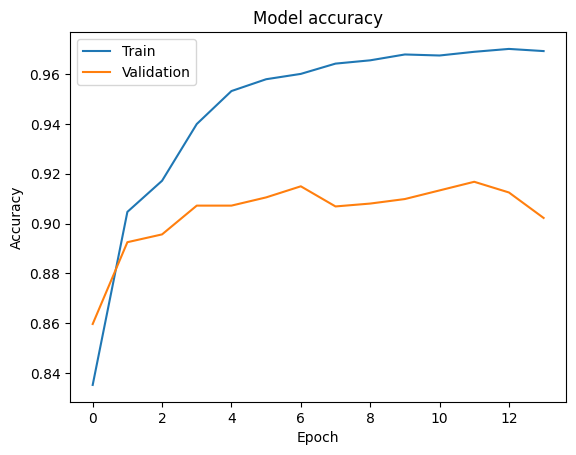

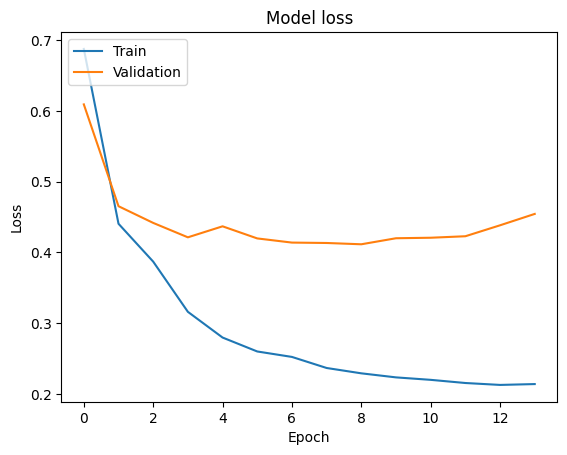

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
# Save the trained model
model.save('trained_bilstm_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Load the pretrained model (Optional)
model = load_model('trained_bilstm_model.keras')

In [32]:
# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

76/76 ━━━━━━━━━━━━━━━━━━━━ 34s 440ms/step - accuracy: 0.8924 - loss: 0.4631
Test Loss: 0.43774935603141785
Test Accuracy: 0.8995253443717957


In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

76/76 ━━━━━━━━━━━━━━━━━━━━ 34s 439ms/step


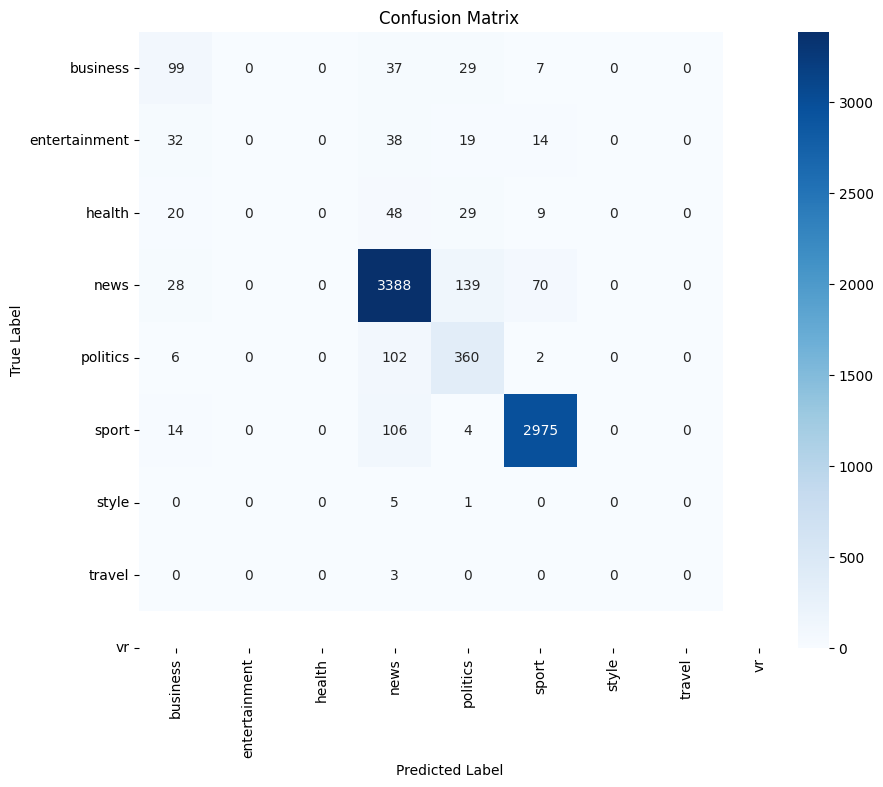

In [35]:
# Predict classes for the test data
y_pred = model.predict(X_test, batch_size=batch_size)
y_pred_classes = y_pred.argmax(axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()